In [5]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# Definamos el sistema usando una lista
G = np.array([lambda x,y,z: 6*x - 2*np.cos(y*z) - 1.,
     lambda x,y,z: 9*y + np.sqrt( x**2 + np.sin(z) + 1.06 ) + 0.9,
     lambda x,y,z: 60*z + 3*np.exp(-x*y)+10*np.pi - 3])

In [7]:
def GetF(G,r):
    
    n = r.shape[0]
    
    v = np.zeros_like(r)
    
    for i in range(n):
        v[i] = G[i](r[0],r[1],r[2])
        
    return v

In [8]:
def GetJacobian(f,r,h=1e-6):
    
    n = r.shape[0]
    
    J = np.zeros((n,n))
    
    for i in range(n):
        for j in range(n):
            
            rf = r.copy()
            rb = r.copy()
            
            rf[j] = rf[j] + h
            rb[j] = rb[j] - h
            
            J[i,j] = ( f[i](rf[0],rf[1],rf[2]) - f[i](rb[0],rb[1],rb[2])  )/(2*h)
            
    
    return J

In [20]:
def NewtonRaphson(G,r,itmax=1000,error=1e-9):
    
    it = 0
    d = 1.
    dvector = []
    
    while d > error and it < itmax:
        
        # Vector actual
        rc = r
        
        F = GetF(G,rc)
        J = GetJacobian(G,rc)
        InvJ = np.linalg.inv(J)
        
        r = rc - np.dot(InvJ,F)
        
        diff = r - rc
        
        d = np.max( np.abs(diff) )
        
        dvector.append(d)
        print(dvector)
        
        it += 1
    
    print(it)
    return r,dvector

In [21]:
r,dvector = NewtonRaphson(G,np.array([0.,0.,0.]))

[0.5235987756181211]
[0.5235987756181211, 0.013464494608999344]
[0.5235987756181211, 0.013464494608999344, 1.3125552370152338e-05]
[0.5235987756181211, 0.013464494608999344, 1.3125552370152338e-05, 7.48751061152575e-12]
4


In [17]:
r

array([ 0.49814468, -0.1996059 , -0.52882598])

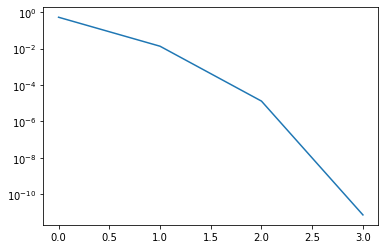

In [19]:
plt.plot(dvector)
plt.yscale('log')